In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
astro = pd.read_csv("E:/Python Programs/Astro_EuroMillions_1.csv")
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,Tuesday,Ashwini,NaN,NaN,NaN,3.0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,Tuesday,Bharani,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,Tuesday,Krittika,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,Tuesday,Rohini,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,Tuesday,Mrigashirsha,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [3]:
astro.fillna(value={"Pada-1":0, "Pada-2":0, "Pada-3":0, "Pada-4":0},inplace=True)

In [4]:
astro["Pada-1"] = astro["Pada-1"].astype(dtype='int32')
astro["Pada-2"] = astro["Pada-2"].astype(dtype='int32')
astro["Pada-3"] = astro["Pada-3"].astype(dtype='int32')
astro["Pada-4"] = astro["Pada-4"].astype(dtype='int32')

In [5]:
encoding = LabelEncoder()
astro["Day"] = encoding.fit_transform(astro["Day"])
astro["Nakshatra"] = encoding.fit_transform(astro["Nakshatra"])

In [6]:
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,1,3,0,0,0,3,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,1,4,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,1,9,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,1,19,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,1,11,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [7]:
astro_train = astro[astro['Data'] == 'Train']
astro_test = astro[astro['Data'] == 'Test']

In [8]:
astro_train.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,1,3,0,0,0,3,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,1,4,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,1,9,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,1,19,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,1,11,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [9]:
astro_train.drop(labels='Data', axis=1, inplace=True)

In [10]:
astro_train.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,1,3,0,0,0,3,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,1,4,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,1,9,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,1,19,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,1,11,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [11]:
astro_test.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
966,Test,0,3,0,0,0,6,6,9,10,30,49,3,4,6 9 10 30 49 3 4
967,Test,0,4,0,1,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
968,Test,0,9,0,3,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
969,Test,0,19,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
970,Test,0,11,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4


In [12]:
astro_test.drop(labels='Data', axis=1, inplace=True)

In [13]:
astro_test.reset_index(inplace=True, drop=True)

In [14]:
astro_test.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,0,3,0,0,0,6,6,9,10,30,49,3,4,6 9 10 30 49 3 4
1,0,4,0,1,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
2,0,9,0,3,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
3,0,19,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
4,0,11,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4


In [16]:
X_tr = astro_train[["Day","Nakshatra","Pada-1","Pada-2","Pada-3","Pada-4"]]
X_tr.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4
0,1,3,0,0,0,3
1,1,4,0,0,0,0
2,1,9,0,0,0,0
3,1,19,0,0,0,0
4,1,11,0,0,0,0


In [17]:
y_tr = astro_train[["1st Num","2nd Num","3rd Num","4th Num","5th Num","1st Lucky Star","2nd Lucky Star"]]
y_tr.head()

,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,7,15,18,46,49,10,12
1,7,15,18,46,49,10,12
2,7,15,18,46,49,10,12
3,7,15,18,46,49,10,12
4,7,15,18,46,49,10,12


In [18]:
X_tst = astro_test[["Day","Nakshatra","Pada-1","Pada-2","Pada-3","Pada-4"]]
X_tst.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4
0,0,3,0,0,0,6
1,0,4,0,1,0,0
2,0,9,0,3,0,0
3,0,19,0,0,0,0
4,0,11,0,0,0,0


In [19]:
y_tst = astro_test[["1st Num","2nd Num","3rd Num","4th Num","5th Num","1st Lucky Star","2nd Lucky Star"]]
y_tst.head()

,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,6,9,10,30,49,3,4
1,6,9,10,30,49,3,4
2,6,9,10,30,49,3,4
3,6,9,10,30,49,3,4
4,6,9,10,30,49,3,4


In [20]:
X_tr.shape, y_tr.shape, X_tst.shape, y_tst.shape

((966, 6), (966, 7), (527, 6), (527, 7))

In [21]:
X_train = np.array(X_tr.values)
X_train=np.reshape(X_train,(966,6,1))
print(X_train.shape)
X_train

(966, 6, 1)


array([[[ 1],
        [ 3],
        [ 0],
        [ 0],
        [ 0],
        [ 3]],

       [[ 1],
        [ 4],
        [ 0],
        [ 0],
        [ 0],
        [ 0]],

       [[ 1],
        [ 9],
        [ 0],
        [ 0],
        [ 0],
        [ 0]],

       ...,

       [[ 1],
        [24],
        [ 9],
        [ 0],
        [ 0],
        [ 0]],

       [[ 1],
        [18],
        [ 0],
        [ 5],
        [ 0],
        [ 0]],

       [[ 1],
        [18],
        [ 0],
        [ 4],
        [ 0],
        [ 0]]])

In [22]:
y_train = np.array(y_tr.values)
y_train=np.reshape(y_train,(966,7))
print(y_train.shape)
y_train

(966, 7)


array([[ 7, 15, 18, ..., 49, 10, 12],
       [ 7, 15, 18, ..., 49, 10, 12],
       [ 7, 15, 18, ..., 49, 10, 12],
       ...,
       [13, 22, 24, ..., 47,  1,  5],
       [13, 22, 24, ..., 47,  1,  5],
       [13, 22, 24, ..., 47,  1,  5]], dtype=int64)

In [23]:
X_test = np.array(X_tst.values)
X_test = np.reshape(X_test,(527,6,1))
print(X_test.shape)
X_test

(527, 6, 1)


array([[[ 0],
        [ 3],
        [ 0],
        [ 0],
        [ 0],
        [ 6]],

       [[ 0],
        [ 4],
        [ 0],
        [ 1],
        [ 0],
        [ 0]],

       [[ 0],
        [ 9],
        [ 0],
        [ 3],
        [ 0],
        [ 0]],

       ...,

       [[ 0],
        [15],
        [ 0],
        [ 8],
        [ 0],
        [ 0]],

       [[ 0],
        [24],
        [ 0],
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [18],
        [ 4],
        [ 0],
        [ 0],
        [ 0]]])

In [24]:
y_test = np.array(y_tst.values)
y_test = np.reshape(y_test,((527,7)))
print(y_test.shape)
y_test

(527, 7)


array([[ 6,  9, 10, ..., 49,  3,  4],
       [ 6,  9, 10, ..., 49,  3,  4],
       [ 6,  9, 10, ..., 49,  3,  4],
       ...,
       [11, 13, 29, ..., 47,  1, 11],
       [11, 13, 29, ..., 47,  1, 11],
       [11, 13, 29, ..., 47,  1, 11]], dtype=int64)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((966, 6, 1), (966, 7), (527, 6, 1), (527, 7))

In [26]:
model = Sequential()

model.add(Flatten(input_shape=(6,1)))

model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dense(400))
model.add(Activation('relu'))

model.add(Dense(800))
model.add(Activation('relu'))

model.add(Dense(1200))
model.add(Activation('relu'))

model.add(Dense(1600))
model.add(Activation('relu'))

model.add(Dense(7))
model.add(Activation('softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1200)                │         961,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1600)                │       1,921,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │          11,207 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 7)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,296,607 (12.58 MB)

 Trainable params: 3,296,607 (12.58 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [28]:
967*0.8/32

24.175

In [29]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8516 - loss: 580.1007 - val_accuracy: 1.0000 - val_loss: 666.4816
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 575.2288 - val_accuracy: 1.0000 - val_loss: 666.4816
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 566.9540 - val_accuracy: 1.0000 - val_loss: 666.4816
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 575.2601 - val_accuracy: 1.0000 - val_loss: 666.4816
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 598.1979 - val_accuracy: 1.0000 - val_loss: 666.4816
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 565.3538 - val_accuracy: 1.0000 - val_loss: 666.4816
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 573.4685 - val_accuracy: 1.0000 - val_loss: 666.4816
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 565.6

In [30]:
model.evaluate(X_test,y_test,batch_size=32)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 635.5266 


[570.9498291015625, 1.0]

In [31]:
predicted_prob = model.predict(X_test, batch_size=32)
predicted_prob

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [32]:
y_predicted = np.array([np.argmax(i) for i in predicted_prob])
y_predicted

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [33]:
# Now y_test which are our true lables

y_test

array([[ 6,  9, 10, ..., 49,  3,  4],
       [ 6,  9, 10, ..., 49,  3,  4],
       [ 6,  9, 10, ..., 49,  3,  4],
       ...,
       [11, 13, 29, ..., 47,  1, 11],
       [11, 13, 29, ..., 47,  1, 11],
       [11, 13, 29, ..., 47,  1, 11]], dtype=int64)

In [34]:
y_true = np.array([np.argmax(i) for i in y_test])
y_true

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

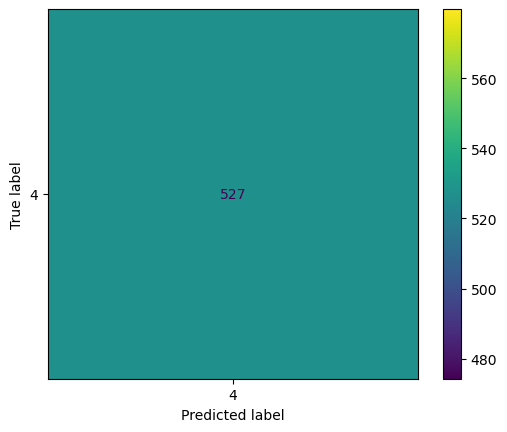

In [35]:
ConfusionMatrixDisplay.from_predictions(y_true, y_predicted)
plt.show()